Experiment 1: Canny Edge Detection
In this experiment, we’ll apply the Canny Edge Detection algorithm, which involves several steps such as smoothing, gradient calculation, and non-maximum suppression.

1. Smoothing
Smoothing is done to reduce noise in the image using Gaussian blur.

2. Gradient Calculation
This is done to compute the edges of an image by detecting changes in intensity using the Sobel operator.

3. Non-Maximum Suppression
This step helps in thinning the edges to make them more distinct by keeping only the local maxima.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the grayscale image
image = cv2.imread('neu.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Gaussian blur (Smoothing)
smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 3: Calculate gradients using Sobel operator
grad_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

# Step 4: Calculate gradient magnitude and direction
gradient_magnitude = cv2.magnitude(grad_x, grad_y)
gradient_direction = cv2.phase(grad_x, grad_y, angleInDegrees=True)

# Step 5: Non-Maximum Suppression using Canny edge detection built-in method
edges = cv2.Canny(smoothed_image, 100, 200)

# Step 6: Plot all images
plt.figure(figsize=(12, 12))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the smoothed image
plt.subplot(2, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

# Plot the gradient magnitude
plt.subplot(2, 3, 3)
plt.imshow(gradient_magnitude.astype(np.uint8), cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

# Plot the gradient direction (scaled for visualization)
plt.subplot(2, 3, 4)
plt.imshow(gradient_direction.astype(np.uint8), cmap='gray')
plt.title('Gradient Direction')
plt.axis('off')

# Plot the edges detected by Canny (Non-Maximum Suppression)
plt.subplot(2, 3, 5)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

# Show the plot with all images
plt.tight_layout()
plt.show()


Experiment 2: Region-Growing Segmentation
In this experiment, we apply the Region Growing Segmentation technique, where the goal is to group pixels with similar properties into regions.

Region-Growing Steps:
Choose a seed point: This is the starting point for the region growing.
Grow the region: Based on pixel intensity similarity or other properties (like color or texture).
Stop when the region growth criteria are met.

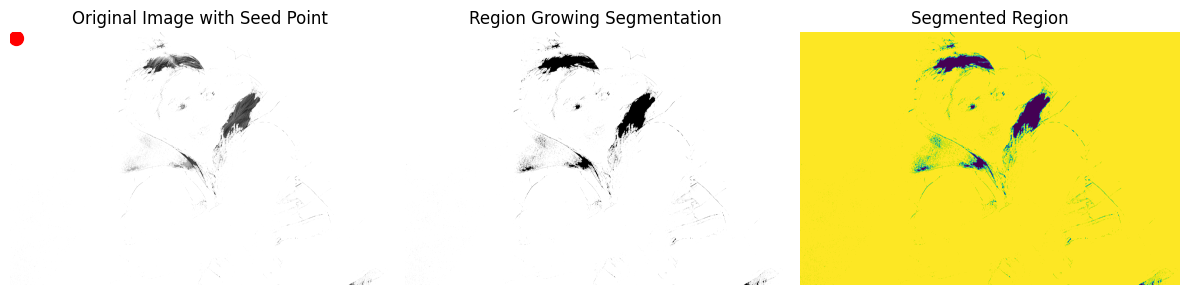

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed, threshold):
    mask = np.zeros((image.shape[0] + 2, image.shape[1] + 2), np.uint8)
    cv2.floodFill(image, mask, seed, 255, loDiff=threshold, upDiff=threshold, flags=4)
    return mask[1:-1, 1:-1]

# Example usage
image = cv2.imread('neu-modified.jpg', cv2.IMREAD_GRAYSCALE)
seed_point = (100, 100)
threshold_value = 20

segmented_region = region_growing(image, seed_point, threshold_value)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.scatter(seed_point[0], seed_point[1], c='r', s=100)
plt.title('Original Image with Seed Point')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(segmented_region, cmap='gray')
plt.title('Region Growing Segmentation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.bitwise_and(image, image, mask=segmented_region.astype(np.uint8)))
plt.title('Segmented Region')
plt.axis('off')

plt.tight_layout()
plt.show()